## PRiAD Projekt

# Breast Cancer Diagnostic

**Zbór danych**: Breast Cancer Wisconsin (Diagnostic). Predict whether the cancer is benign or malignant

**Zadanie**: Eksploracyjna analiza danych oraz predykcja czy rak jest złośliwy (M) czy łagodny (B)  dla zbioru Breast Cancer Wisconsin

**Skład zespołu**: Martyna Kochalska, Polina Nesterova

**Data wykonania**: DD-MM-RRRR

## 1. Import bibliotek i wczytanie zbioru danych

In [22]:
import kagglehub

# Download latest version
path = "data.csv"

print("Path to dataset files:", path)

Path to dataset files: data.csv


In [23]:
# Importy 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Wczytanie danych
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Wyjaśnienie:
W tej sekcji importujemy niezbędne biblioteki, takie jak `pandas` do przetwarzania danych, `seaborn` i `matplotlib` do wizualizacji, oraz narzędzia ze `sklearn` do przetwarzania danych i ich podziału. 

Dane pochodzą ze zbioru Breast Cancer Wisconsin (Diagnostic), a poniższy kod przedstawia **pierwszych kilka wierszy danych**.

## 2. Analiza rozkładu klas

Rozkład klas (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64


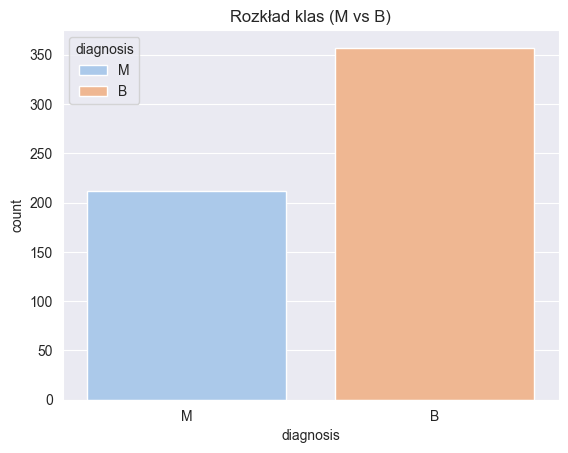

In [24]:
print("Rozkład klas (diagnosis):")
print(data['diagnosis'].value_counts())

sns.countplot(x='diagnosis', hue='diagnosis', data=data, palette='pastel', legend=True)
plt.title("Rozkład klas (M vs B)")
plt.show()

### Wyjaśnienie: 
Z powyższego wykresu możemy określić, czy dane są zbalansowane. 
W przypadku klasyfikacji niezbalansowany zbior może wymagać specjalnych metod np. oversampling.

## 4. Konwersja klasy na wartości binarne (M: 1, B: 0)

In [25]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

### Wyjaśnienie: 
Konwersja wartości diagnozy na wartości binarne (M: 1, B: 0) upraszcza interpretację wyników modelu klasyfikacyjnego i umożliwia łatwiejszą implementację algorytmów ML.

## 5. Usunięcie kolumny 'id', ponieważ nie wnosi wartości do analizy

In [26]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

### Wyjaśnienie: 
Kolumna 'id' to tylko identyfikator i nie ma związku z predykcją. 
Usunięcie jej zmniejsza szum w danych.

## 6. Wizualizacja - wykresy pudełkowe dla wybranych cech

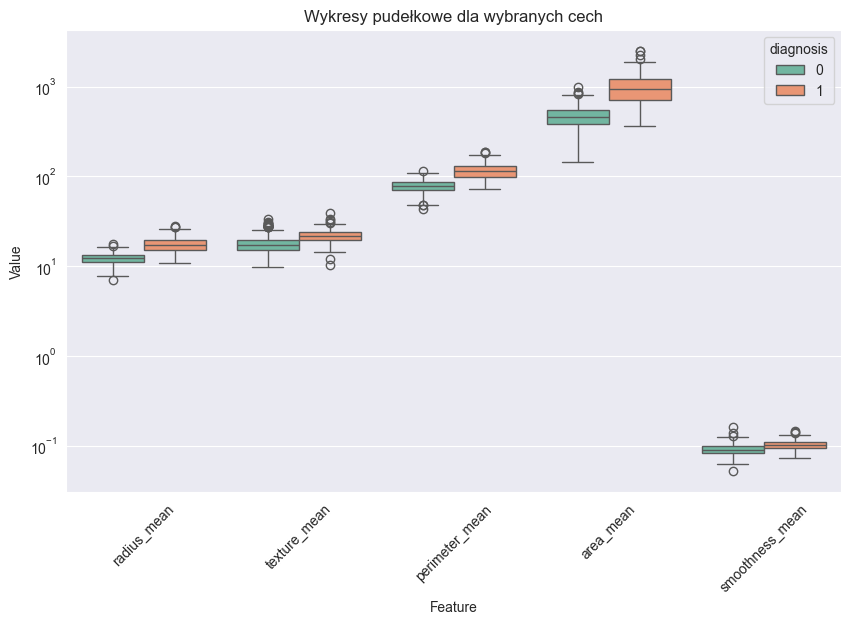

In [27]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
data_melted = data.melt(id_vars='diagnosis', value_vars=features, 
                        var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='diagnosis', data=data_melted, palette='Set2')
plt.yscale('log')  # Logarytmiczna skala dla osi Y
plt.title("Wykresy pudełkowe dla wybranych cech")
plt.xticks(rotation=45)
plt.show()

### Wyjaśnienie: 
Wykres pudełkowy pozwala wizualizować rozkład wartości danej cechy w zależności od klasy diagnozy (M lub B). 


### Wnioski: 
Wykresy pudełkowe pokazują wyraźne różnice w rozkładzie wartości cech między klasami diagnozy. Cechy takie jak radius_mean i area_mean mogą być kluczowe w odróżnianiu klas, co warto uwzględnić podczas wyboru cech do modelu.

## 7. Wizualizacja - histogramy dla wybranych cech

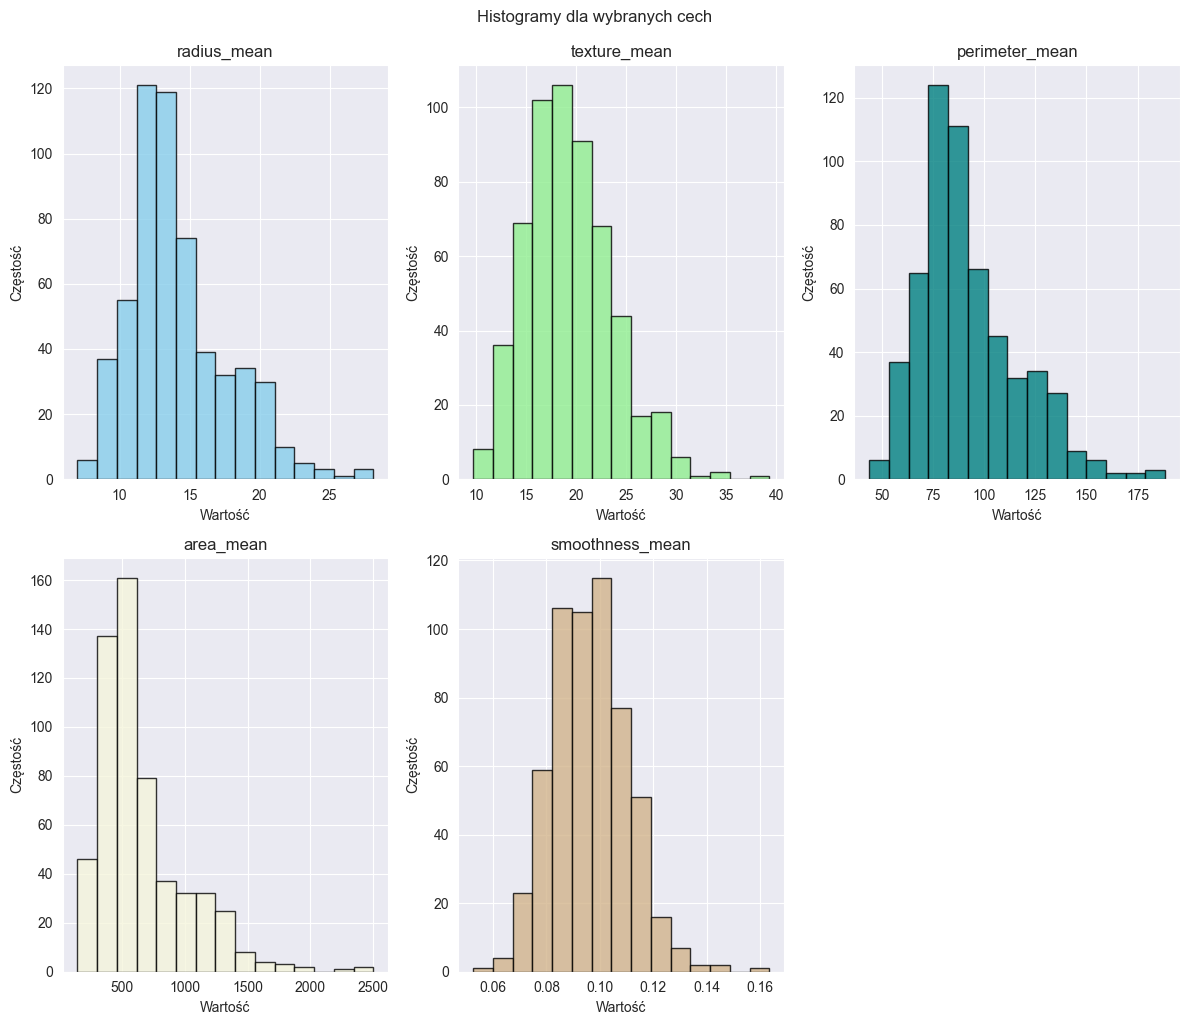

In [28]:
colors = ['skyblue', 'lightgreen', 'teal', 'beige', 'tan']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Układ w siatce 2x3 (dla maksymalnie 6 cech)
    data[feature].hist(bins=15, color=colors[i], edgecolor='black', alpha=0.8)
    plt.title(feature)
    plt.xlabel("Wartość")
    plt.ylabel("Częstość")

plt.tight_layout()  # Automatyczne dopasowanie wykresów
plt.suptitle("Histogramy dla wybranych cech", y=1.02)  # Tytuł globalny
plt.show()


### Wyjaśnienie: 
Histogram pokazuje rozkład liczebności dla każdej cechy i pozwala zidentyfikować, czy istnieje wyraźna separacja między klasami.

### Wnioski: 
Histogramy potwierdzają, że pewne cechy, takie jak radius_mean czy perimeter_mean, mają rozkłady, które mogą ułatwić separację klas. Widoczne różnice w wartościach między klasami wskazują na ich wysoką istotność w klasyfikacji.

In [29]:
## 8. Analiza korelacji

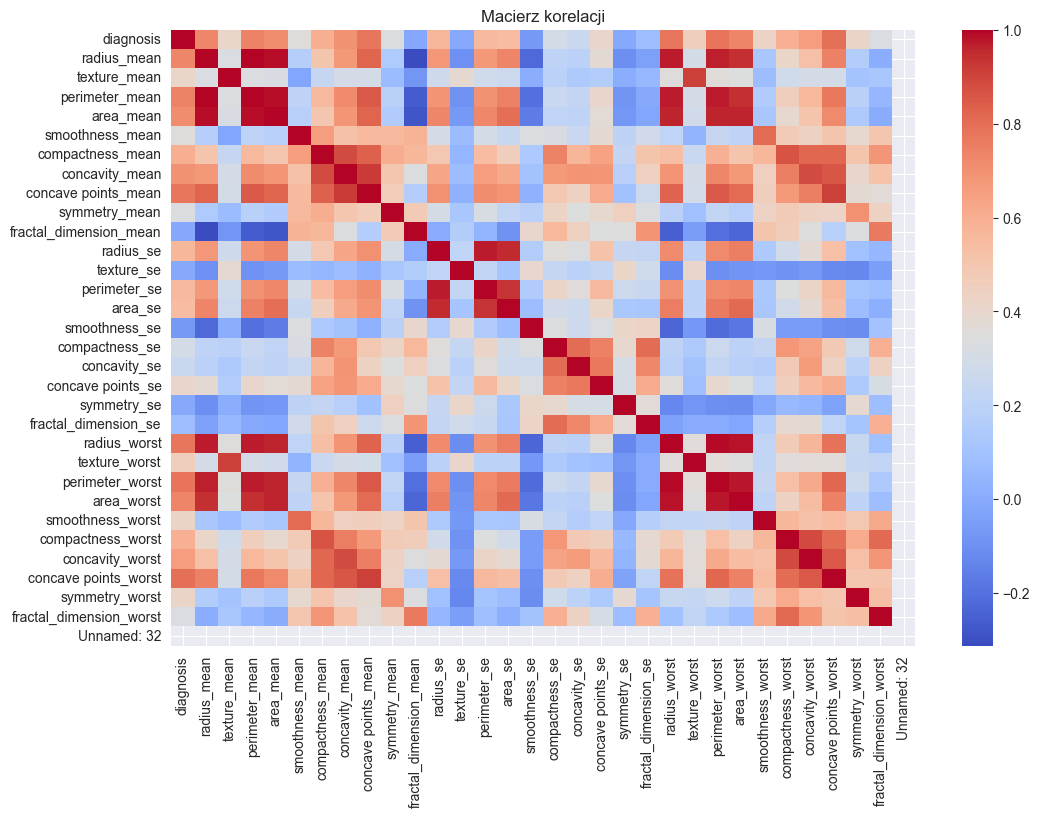

In [30]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Macierz korelacji")
plt.show()

### Wyjaśnienie: 
Macierz korelacji pokazuje siłę związku między zmiennymi. Można na jej podstawie wybrać najbardziej istotne cechy do modelu

## 9. Identyfikacja najważniejszych cech względem diagnozy

In [31]:
correlation_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("Korelacja cech z diagnozą (malejąco):")
print(correlation_with_diagnosis.head(10))

Korelacja cech z diagnozą (malejąco):
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


### Wyjaśnienie: 
Wysoka korelacja wskazuje cechy najbardziej związane z klasyfikacją diagnozy.

### Wnioski: 
Cechy takie jak **concave points_worst, perimeter_worst, itd** mają najwyższą korelację z diagnozą. Powinny one zostać uwzględnione w modelu klasyfikacyjnym, ponieważ mają największy wpływ na wyniki.

## 10. Sprawdzenie brakujących wartości

In [32]:
missing_values = data.isnull().sum()
print(f"Brakujące wartości (suma w całych danych) = {missing_values.sum()}")

Brakujące wartości (suma w całych danych) = 569


### Wyjaśnienie: 
Brak brakujących wartości oznacza, że nie musimy stosować imputacji czy usuwania wierszy.

## 11. Normalizacja/standaryzacja danych

In [33]:
features_to_scale = data.drop('diagnosis', axis=1).columns

### 11.a. Sprawdzenie cech o zerowej wariancji

In [34]:
zero_var_features = [col for col in features_to_scale if data[col].nunique() <= 1]
if zero_var_features:
    print("Cechy o zerowej wariancji:", zero_var_features)
    data.drop(columns=zero_var_features, inplace=True)
    features_to_scale = data.drop('diagnosis', axis=1).columns

Cechy o zerowej wariancji: ['Unnamed: 32']


### 11.b. Sprawdzenie obecności wartości nieskończonych

In [35]:
infinite_values = data[features_to_scale].isin([np.inf, -np.inf]).sum()
if infinite_values.sum() > 0:
    print("Znaleziono wartości nieskończone w kolumnach:")
    print(infinite_values[infinite_values > 0])
    # Zamiana wartości nieskończonych na NaN
    data[features_to_scale] = data[features_to_scale].replace([np.inf, -np.inf], np.nan)
    # Opcjonalnie: usunięcie wierszy z NaN
    data.dropna(subset=features_to_scale, inplace=True)

### 11.c. Finalne sprawdzenie brakujących wartości po ewentualnych korektach

In [36]:
missing_after = data[features_to_scale].isnull().sum().sum()
if missing_after > 0:
    print(f"Usuwanie wierszy z brakującymi wartościami: {missing_after}")
    data.dropna(subset=features_to_scale, inplace=True)

## 12. Klasyfikacja

W tej części zastosujemu różne modele klasyfikacyjne, takie jak KNN, Naive Bayes oraz Drzewo Decyzyjne, o których uczyliśmy się na zajęciach, oraz dodatkowo zapoznamy się z metodą Random Forest oraz Regresją logistyczną. Uzyskamy ich skuteczność korzystając z danych testowych, a na koniec porównamy wyniki danych modeli.

### 12.a Zaimportujmy najpierw niezbędne biblioteki:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict 

### Wyjaśnienie
KNeighborsClassifier - gotowa implementacja algorytmu KNN z biblioteki scikit-learn  <br>
GaussianNB - gotowa implementacja algorytmu Naive Bayes z biblioteki scikit-learn  <br>
DecisionTreeClassifier - gotowa implementacja algorytmu Drzewa Decyzyjnego z biblioteki  scikit-learn  <br>
RandomForestClassifier - gotowa implementacja algorytmu Random Forest z biblioteki  scikit-learn  <br>
LogisticRegression - gotowa implementacja algorytmu Regresji Logistycznej z biblioteki  scikit-learn  <br>
accuracy_score, precision_score, recall_score, f1_score - metryki oceny skuteczności klasyfikacji  <br>
defaultdict - słownik, który automatycznie tworzy i zwraca wartość domyślną dla nieistniejących kluczy, zamiast podnosić wyjątek KeyError

### 12.b Wstępna konfiguracja:


In [38]:
n_iterations = 10
metrics = ['accuracy', 'precision', 'recall', 'f1']
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42)
}

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

results = defaultdict(list)

### Wyjaśnienie:
n_iterations to liczba powtórzeń późniejszej pętli skryptu. Pętla ta umożliwi przetesowanie stabilności zależne od różnych podziałów danych. <br>
4 kluczowe metryki - ['accuracy', 'precision', 'recall', 'f1'] będą przydatne do problemów klasyfikacji binarnej <br>
Dodajemy modele do słownika, aby poźniej w skrypcie móc je sprawdzić hurtowo, nie powtarzając kodu. <br>
random_state to parametr kontrolujący losowość procesu, zapewni w modelu drzewiastych reprodukowalność (na nasze potrzeby przydatną, w środowisku produkcyjnym się tego nie używa) <br>
Dane dzielimy na X i Y, czyli kolejno na dane bez kolumny diagnozy, oraz samą diagnozę. 


### 12.c Skrypt testujący modele

Ze względu na długość skryptu użyję komentarzy bezpośrednio w kodzie do opisu zdarzeń

In [39]:
for seed in range(n_iterations):
    # Podział danych z uwzględnieniem stratyfikacji (wyrównania proporcji klas względem orginału) 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=seed, 
        stratify=y
    )
    
    # Skalowanie dla wybranych modeli (KNN, Regresja logistyczna)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Testowanie każdego modelu
    for model_name, model in models.items():
        # Wybór wersji danych (skalowanych/zwykłych)
        if model_name in ['KNN', 'Logistic Regression']:
            train_data = X_train_scaled
            test_data = X_test_scaled
        else:
            train_data = X_train
            test_data = X_test
            
        # Trening i predykcja
        model.fit(train_data, y_train)
        preds = model.predict(test_data)
        
        # Zapis wyników
        results[f'{model_name}_accuracy'].append(accuracy_score(y_test, preds))
        results[f'{model_name}_precision'].append(precision_score(y_test, preds))
        results[f'{model_name}_recall'].append(recall_score(y_test, preds))
        results[f'{model_name}_f1'].append(f1_score(y_test, preds))

print(f"Liczba próbek treningowych: {len(X_train)}")
print(f"Liczba próbek testowych: {len(X_test)}")

Liczba próbek treningowych: 398
Liczba próbek testowych: 171


### Wyjaśnienie: 
Rozdzielenie danych na zbiór treningowy i testowy zapewnia możliwość oceny modelu na niezależnym zbiorze. Rozkład (70% treningowy, 30% testowy) jest standardowy i powinien umożliwić dobrą ocenę wydajności modelu. <br>
Stratyfikacja zachowuje proporcje klas w podziałach danych. Każda iteracja używa innego ziarna losowości (seed) <br>
Standaryzacja danych zapewnia porównywalność cech niezależnie od ich jednostek i zakresów. Niektóre modele działają na danych surowych, co przyspiesza obliczenia  <br>



### 12.d Analiza wyników


In [40]:
# Inicjalizacja pustych struktur danych
results_df = pd.DataFrame(results)
summary = pd.DataFrame()

# Obliczanie średniej i odchylenia standardowego dla każdej metryki i modelu
for model in models.keys():
    for metric in metrics:
        col_name = f'{model}_{metric}'
        summary.loc['mean', col_name] = np.mean(results_df[col_name])
        summary.loc['std', col_name] = np.std(results_df[col_name])

# Przekształcenie danych do formatu long
summary_long = summary.stack().reset_index()
summary_long.columns = ['Stat', 'Metric_Model', 'Value']
summary_long[['Model', 'Metric']] = summary_long['Metric_Model'].str.split('_', expand=True)
summary_pivot = summary_long.pivot_table(index=['Model', 'Metric'], columns='Stat', values='Value')

# Stylowanie z gradientem i zaokrągleniem
styled = (summary_pivot.style
          .background_gradient(subset=['mean'], cmap='Blues')
          .background_gradient(subset=['std'], cmap='Reds')
          .format("{:.3f}"))

display(styled)

Główne wnioski wypiszę ostatniej sekcji notatnika, po części wizualizacyjnej. <br> <br>
**Jak odczytywać uzyskane dane?** <br> <br>
**Odchylenie standardowe (std):** <br>
<0.02: doskonała stabilność <br>
0.02-0.04: akceptowalna zmienność <br>
\>0.05: problem ze stabilnością <br> 
KNN: std 0.031 dla recall -> największa wrażliwość na podział danych <br> <br> <br>

**Accuracy (Dokładność):** <br>
\>0.95: Wynik doskonały (w medycynie rzadko osiągany) <br>
0.90-0.95: Bardzo dobry <br>
0.85-0.90: Akceptowalny <br>
<0.85: Wymaga poprawy <br> <br> 
"Na 100 pacjentów, u ilu ogólnie dobrze postawiono diagnozę?" <br> 
KNN 96,2% -> 3-4 błędne diagnozy na 100 przypadków.  <br> <br> <br>

**F1-Score:**  <br>
\>0.95: Idealna równowaga <br>
0.90-0.95: Dobry kompromis <br>
0.85-0.90: Wymaga optymalizacji <br>
<0.85: Nierównowaga metryk <br> <br>
"Harmonijna średnia między precyzją (precision) a czułością (recall'em)" <br>
Logistic Regression: 95.8% -> dobry kompromis między FP i FN (false-positive i false-negative) <br> <br> <br>

**Precision (Precyzja):**  <br>
\>0.95: Minimalna liczba fałszywie pozytywnych  <br>
0.90-0.95: Dobre zarządzanie FP  <br> (false-positive)
0.85-0.90: Umiarkowana liczba FP  <br>
<0.85: Ryzyko niepotrzebnych biopsji  <br>  <br>
"Spośród wszystkich zdiagnozowanych jako 'rak', u ilu faktycznie był rak?" <br>
KNN: 98.3% -> tylko 1-2 fałszywe alarmy na 100 pozytywnych wyników <br> <br> <br>



**Recall (Czułość):** <br>
\>0.95: Bardzo mało przeoczonych nowotworów <br>
0.90-0.95: Akceptowalny poziom FN (false-negative) <br>
0.85-0.90: Ryzyko przeoczenia <br>
<0.85: Niebezpieczne do diagnostyki - duża liczba przeoczeń (FN) <br><br>
"Ile % prawdziwych nowotworów zostało wykrytych?" <br>
Naive Bayes 86.6% -> 13-14 nowotworów przeoczono na 100  <br> <br> <br>
<strong> W diagnostyce nowotworów priorytetem jest wysoki recall (lepiej mieć więcej fałszywie pozytywnych niż przeoczyć nowotwór). <strong>

### Wizualizacja
W tej części zastosujemy 3 rodzeje wykresów: pudełkowy, radarowy i mapę ciepła. <br>
Pierwszy umożliwi nam zobaczenie jak różne metryki zachowują się dla tego samego modelu (np. czy recall jest bardziej rozproszony niż accuracy) oraz zauważenie pojedynczych iteracji z ekstremalnymi wynikami. <br>
Drugi - jak model wypada względem różnych metryk jednocześnie <br>
Heatmapa za to poda wszystkie odchylenia standardowe w jednym widoku oraz pokaże bezpośrednie porównanie stabilności między modelami.

 Stwórzmy najpierw pustą figurę dla wykresów o wielkości 15x10. <br>
 Następnie iterując po kolejnych metrykach dodajemy wykresy pudełkowe, 2 wiersze, 2 kolumny i-ta pozycja. <br>
 Przekształcamy dane do formatu long <br>
 [c for c in results_df if metric in c]: Tworzy listę kolumn, które zawierają w nazwie aktualną metrykę.  <br>
 .melt(value_vars=...): Przekształca wybrane kolumny do formatu długiego  <br> <br>
 Następnie tworzymy wykres: <br>
data=plot_data: Wybór danych. <br>
x='value': Oś pozioma zawiera wartości metryk. <br>
y='variable': Oś pionowa grupuje modele (np. KNN_accuracy). <br>
hue='variable': Grupowanie kolorów dla każdego modelu, dzięki czemu każdy model ma inny kolor. <br>
palette='Set2': Zastosowanie palety kolorów dla czytelności wykresu.<br>
legend=False: Wyłączenie legendy, ponieważ każdy wykres przedstawia jedną metrykę. <br><br>
Następna sekcja kolejno: dodaje tytuł, ukrywa etykiety osi X i Y, ustawia zakres wartości na osi x od 0.8 do 1.05, dostosowywuje odstępy i wyświetla wykres.

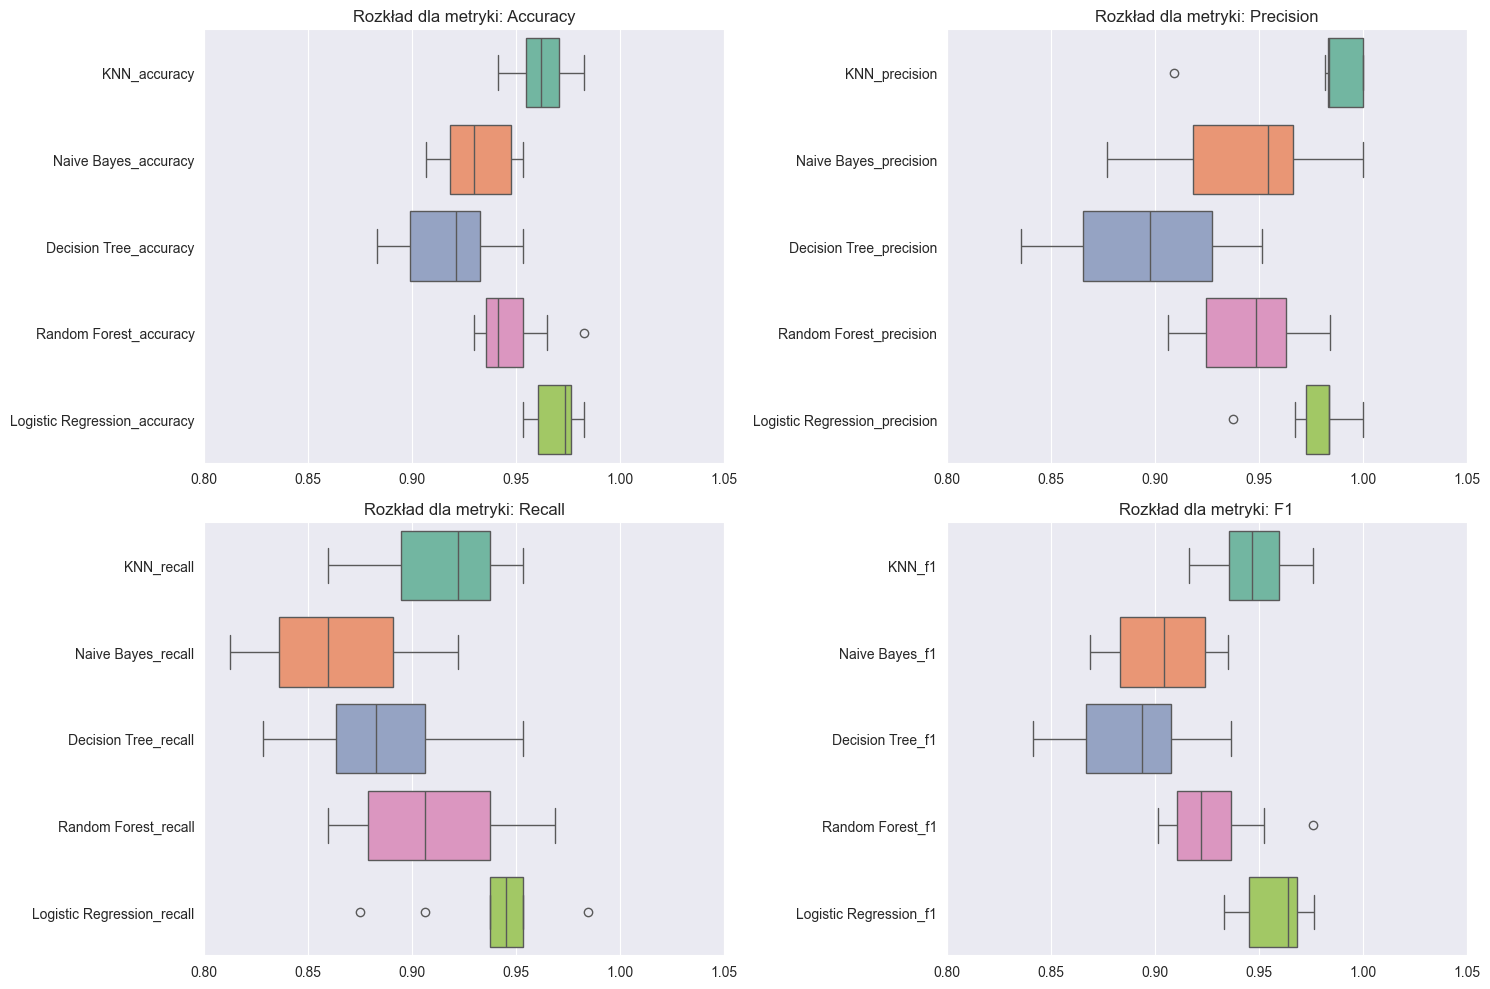

In [47]:
plt.figure(figsize=(15, 10))
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1'], 1):
    plt.subplot(2, 2, i)
    
    plot_data = results_df.melt(value_vars=[c for c in results_df if metric in c])
    
    sns.boxplot(
        data=plot_data,
        x='value',
        y='variable',  
        hue='variable',  
        palette='Set2',
        legend=False
    )
    
    plt.title(f'Rozkład dla metryki: {metric.capitalize()}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0.8, 1.05)
    
plt.tight_layout()
plt.show()

**Co obserwować w wykresie?** <br>
Szerokość pudełka i "wąsów": wąskie zapewnia stabilnośc, a szerokie wrażliwośc na podział danych. <br>
Pozycja mediany (kreski w pudełku): Wysoka mediana + wąskie pudełko = dobry stabilny model <br>
Kropki: Dane, które można uznać za outliery.  <br><br>
Z wykresu widać, że KNN oraz regresja logistyczna wykazują się dobrą stabilnością.

Kolejnym wykresem jest wykres radarowy. <br>
Po utworzeniu figury, kategorii, tworzymy listę wyników dla danego modelu, pobierając wartości średnich (mean) z tabeli summary_pivot. <br>
Po wygenerujemy kądy dla osi. <br>
.linspace(0, 2*np.pi, N, endpoint=False): Tworzy równomiernie rozmieszczone kąty od 0 do 2π dla każdej metryki. <br> 
Po tym zamykamy wykres radarowy, dodając pierwszą wartość metryki oraz pierwszy kąt na koniec listy.
Dzięki temu wykres tworzy pełne koło, a linie są domknięte. <br> <br>
Argument polar = True przy dodawaniu podwykresu ustawia go w układzie biegunowym (radarowym)<br>
ax.plot Rysuje linię łączącą punkty dla danego modelu <br>
angles: Kąty odpowiadające metrykom. <br>
values: Wartości dla metryk danego modelu. <br>
linewidth=1: Ustawia grubość linii na 1. <br> 
linestyle='solid': Ustawia styl linii jako ciągłą. <br> <br>

ax.fill wypełnia obszar pod linią dodając przeźroczystośc = 0.25 <br>
ax.set_ylim ustawia, podobnie jak xlim wartości na osi w zakresie od 0.7 do 1, tym razem na osi jednak y.<br>
set_xticks i set_xticklabels dodaje etykiety

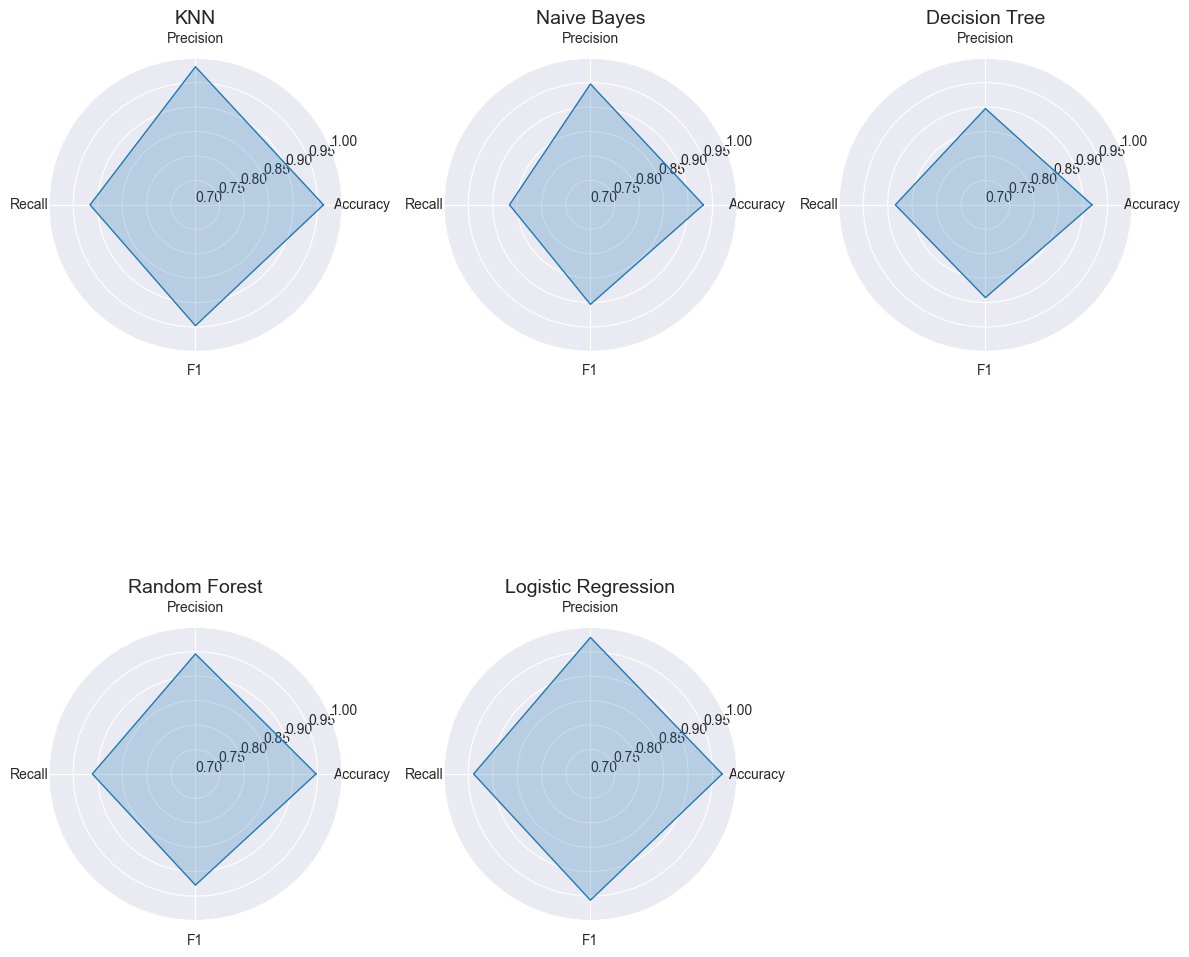

In [42]:
fig = plt.figure(figsize=(12, 12))
categories = ['Accuracy', 'Precision', 'Recall', 'F1']
N = len(categories)

for i, model in enumerate(models.keys()):
    values = [
        summary_pivot.loc[(model, 'accuracy'), 'mean'],
        summary_pivot.loc[(model, 'precision'), 'mean'],
        summary_pivot.loc[(model, 'recall'), 'mean'],
        summary_pivot.loc[(model, 'f1'), 'mean']
    ]
    
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    
    ax = fig.add_subplot((len(models) + 2) // 3, 3, i+1, polar=True) 
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_ylim(0.7, 1.0)
    ax.set_title(model, size=14, position=(0.5, 1.1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

plt.tight_layout()
plt.show()

Wykresy radarowe pozwalają na szybkie oszacowanie średniej wartości różnych metryk dla wszystkich modeli. Można zauważyć, że regresja logistyczna ma największy promień przy wszystkich metrykach, a drzewo decyzyjne najmniejsze. Naive Bayes mimo nienajgorszej precyzji wykazuje bardzo niski recall. 

Na koniec wykres heatmapy <br>
summary_pivot['std']: Pobiera kolumnę std (odchylenie standardowe) z tabeli przestawnej summary_pivot. <br>
.unstack(): Przekształca hierarchiczny indeks, tworząc szeroki format (modele jako kolumny). <br>
.T: Transponuje dane, aby metryki były w wierszach, a modele w kolumnach (lepsza czytelność wykresu). <br>

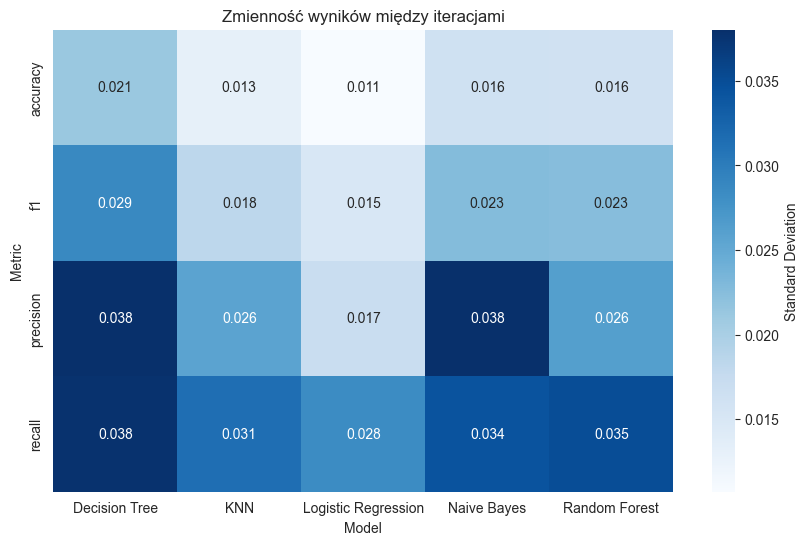

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    summary_pivot['std'].unstack().T,
    annot=True, fmt=".3f",
    cmap="Blues", cbar_kws={'label': 'Standard Deviation'}
)
plt.title("Zmienność wyników między iteracjami")
plt.show()

Wizualne przedstawienie odchylenia standardowego wyników. <br>
Przy pomocy heatmapy można łatwo zaobserować, czy model jest stabilny, czyli czy daje powtarzalne wyniki przy różnych podziałach danych.  <br>
Jedna kolumna - Logistic Regresion ma widocznie najlepsze, najniższe wyniki. Najgorsze wyniki zaś osiągają kolumny Decision Tree oraz Naive Bayes, co wskazuje na ich dużą zmienność w zależności od konkretnego podziału danych.


## 13.e Wnioski: 
Otrzymane wyniki >0.9 accuracy dla zbioru danych (WDBC) to typowe wartości. Wynika to z: <br>
-Dobrze wyselekcjonowanych cech medycznych<br>
-Niskiego poziomu szumu w danych<br>
-Łatwo rozdzielalnych klas w przestrzeni cech <br><br>

Najlepszy model klasyfikacyjny dla tego datasetu: <br>
1. Logistic Regression – osiąga najwyższą dokładność 97%, czułość 93,9%, zbalansowanie F1 95,5%  oraz dobrą precyzję 97,9%, a jednocześnie charakteryzuje się najmniejszą zmiennością wyników, co czyni go najbardziej godnym zaufania modelem. <br>

Najgorsze modele klasyfikacyjne dla tego datasetu: <br>
1. Naive Bayes - niska czułość 86,6% oznacza, że model może przeoczyć dużo (13 - 14%) przypadków pozytywnych, co przy detekcji złośliwości raka jest wynikiem niebezpiecznym. Jest niestabilny (3,4% recall, 3,8% precision). Dodatkowo ma najniższą precyzję ze wszystkich modeli na poziomie 94,7%. <br>
2. Decision Tree - ma najwyższą niestabilność dla wszystkich metryk i stosunkowo niskie wartości średnie 

<br>

Wyniki wskazują, że mimo relatywnie małego zbioru danych (569 próbek), modele zespołowe (Random Forest) i regresja logistyczna zachowują stabilność. Jednak prostsze modele (zwłaszcza Decision Tree) wykazują charakterystyczną dla małych zbiorów wrażliwość na podział danych, co przejawia się wysokim odchyleniem standardowym precyzji (3.8%). <br>
Sugeruje to konieczność:<br>
- Preferowania modeli mniej wrażliwych na wariancję danych<br>
- Aggregacji wyników z wielu iteracji<br>
- Zastosowania walidacji krzyżowej zamiast pojedynczego podziału<br><br>

Dla zakresu tego projektu nie wykorzystaliśmy walidacji krzyżowej stratyfikowanej, jest to jednak obszar, o który możnaby rozwinąć projekt. Zastosowanie jej w analizie danych medycznych pozwala na bardziej rzetelną ocenę modeli i zmniejsza ryzyko błędnych wyników klasyfikacji. <br>
Ta technika jest przydatna gdy:<br>
- Pracujemy z nierównymi klasami<br>
- Chcemy uzyskać bardziej wiarygodną ocenę modelu.<br>
- Mamy ograniczoną ilość danych, gdzie każdy rekord jest cenny.<br>

